In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd

data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv')
test= pd.read_csv(data_path + 'test.csv')
submission = pd.read_csv(data_path + 'sampleSubmission.csv')

### 6.4.1 피처 엔지니어링

* 이상치 제거

In [3]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

* 데이터 합치기

In [4]:
all_data_tmp = pd.concat([train, test])
all_data_tmp

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [5]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


In [6]:
from datetime import datetime

#날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
#연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
#요일 피처 생성
all_data['weekday'] = all_data['date'].apply(lambda dateString: datetime.strptime(dateString, '%Y-%m-%d').weekday())

* 필요 없는 피처 제거

In [7]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']
all_data = all_data.drop(drop_features, axis=1)

**피처 선택**  
모델링 시 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 작업을 **피처 선택**(feature selection)이라고 한다. 피처 선택은 머신러닝 모델 성능에 큰 영향을 준다. 타깃값 예측과 관련 없는 피처가 많다면 오히려 예측 성능이 떨어진다. 피처 선택 방법에는 정답이 없다. 어떤 피처를 선택해야 성능이 가장 좋을지 바로 알 방법은 없다. 탐색적 데이터 분석, 피처 중요도(feature importance), 상관관계 매트릭스 등을 활용해 종합적으로 판단해야 한다.

* 데이터 나누기

In [8]:
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count']

In [9]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


### 6.4.2 평가지표 계산 함수 작성

In [10]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수 변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true + 1))
    log_pred = np.nan_to_num(np.log(y_pred + 1))
    
    #RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    return output
    

### 6.4.3 모델 훈련

In [11]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [12]:

log_y = np.log(y) #타깃값 로그 변환
linear_reg_model.fit(X_train, log_y) #모델 훈련

LinearRegression()

### 6.4.4 모델 성능 검증

In [13]:
preds = linear_reg_model.predict(X_train)

In [14]:
print(f'선형 회귀의 rmsle 값: {rmsle(log_y, preds, True): .4f}')

선형 회귀의 rmsle 값:  1.0205


### 6.4.5 예측 및 결과 제출

In [15]:
linearreg_preds = linear_reg_model.predict(X_test) #테스트 데이터로 예측
submission['count'] = np.exp(linearreg_preds) # 지수 변환
submission.to_csv('submission.csv', index=False)

## 6.5 성능 개선1: 릿지 회귀 모델

* 릿지 회귀 모델은 L2 규제를 적용한 회귀 모델이다. **규제**(regularization)란 모델이 훈련 데이터에 과대적합(overfitting)되지 않도록 해주는 방법이다. 훈련 데이터에 과댁적합되면 모델이 훈련 데이터에만 너무 잘 들어맞고, 테스트 데이터로는 제대로 예측하지 못한다. 

### 6.5.1 하이퍼파라미터 최적화(모델 훈련)

* 모델 생성

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

In [17]:
# 하이퍼파라미터 값 목록
ridge_params = {'max_iter': [3000], 'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

In [18]:
log_y = np.log(y)
gridsearch_ridge_model.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400,
                                   800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [19]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 6.5.2 성능 검증

In [20]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 1.0205


## 6.6 성능개선2: 라쏘 회귀 모델

* 라쏘 회귀 모델은 L1 규제를 적용한 선형 회귀 모델이다.

### 6.6.1 하이퍼파라미터 최적화(모델 훈련)

In [21]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter': [3000], 'alpha': lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)

# 그리드 서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


### 6.6.2 성능 검증

In [22]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)
# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


## 6.7 성능 개선3: 랜덤 포레스트 회귀 모델

### 6.7.1 하이퍼파라미터 최적화(모델 훈련)

In [23]:
from sklearn.ensemble import RandomForestRegressor

randomforest_model = RandomForestRegressor()

# 그리드서치 객체 생성
rf_params = {'random_state': [42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model, param_grid=rf_params, scoring=rmsle_scorer, cv=5)

# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [24]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)
# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1126


### 6.7.3 예측 및 결과 제출

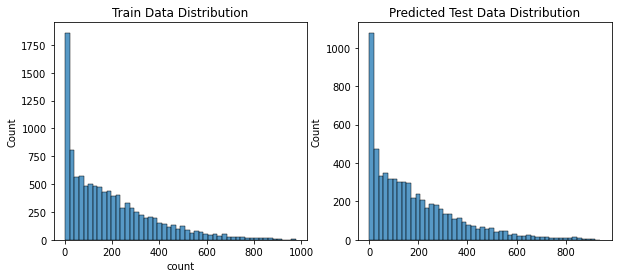

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt


randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [26]:
submission['count'] = np.exp(randomforest_preds) # 지수 변환
submission.to_csv('submission.csv', index=False)
